In [6]:
#import Librerie
from sklearn.datasets import fetch_openml
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D  # Necessario per la visualizzazione 3D

In [7]:
#recupero il dataset
ds = pd.read_csv("../../data/raw/pendigits.csv")

#estraggo le features e i targets
X = ds.drop(columns = "target")
y = ds["target"]

In [8]:
#faccio tre procedimenti complementari, uno con i dati raw, uno con i dati normalizzati e uno con i dati standardizzati
#inizializzo lo standardizzatore
scaler = StandardScaler()

#standardizzo i dati (media 0 e varianza 1)
X_std = scaler.fit_transform(X)

#normalizzo i dati (valori tra 0 e 1)
X_norm = (X - X.min()) / (X.max() - X.min())

#creo una lista con i tre dataset
datasets = [X, X_std, X_norm]
datasets_names = ["Raw", "Standardized", "Normalized"]


/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


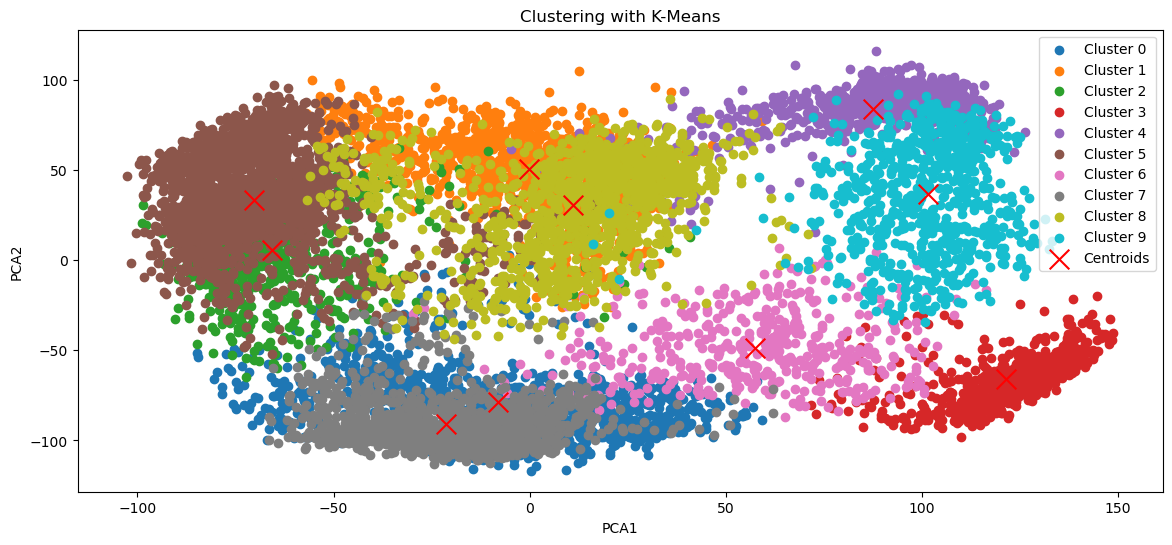

Metriche con Dataset: Raw
ARI: 0.5442289252152805
NMI: 0.6822008815866709
Homogeneity: 0.6683239516876879
Completeness: 0.6966663058236525
V-Measure: 0.682200881586671




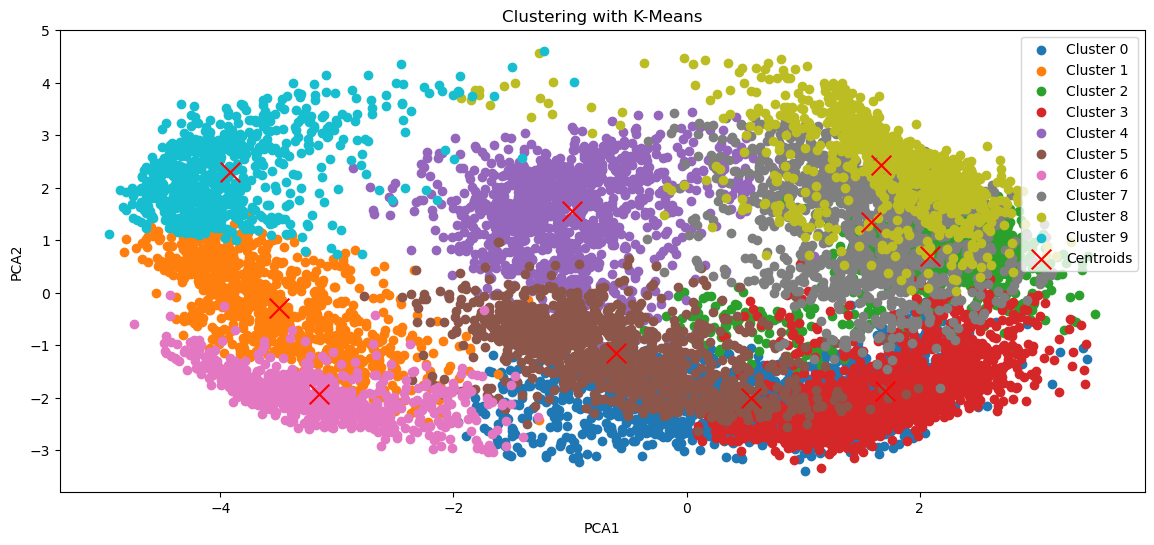

Metriche con Dataset: Standardized
ARI: 0.6043209469965586
NMI: 0.7088969002066173
Homogeneity: 0.7038712458571638
Completeness: 0.7139948371946025
V-Measure: 0.7088969002066172




/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


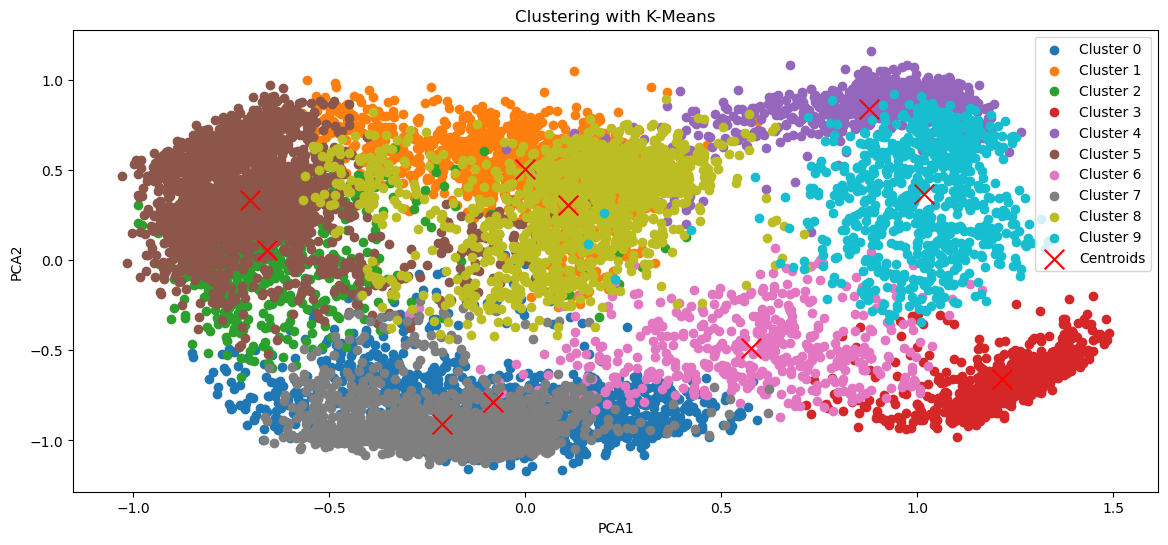

Metriche con Dataset: Normalized
ARI: 0.5442289252152805
NMI: 0.6822008815866709
Homogeneity: 0.6683239516876879
Completeness: 0.6966663058236525
V-Measure: 0.682200881586671




In [9]:
#carico il modello kmeans
#il parametro n_init='auto' indica quante volte verranno generati i nuovi centroidi
kmeans = KMeans(n_clusters=10, random_state=43, n_init='auto')

#per ogni dataset eseguo il kmeans e prendo centroidi e labels
for i, X in enumerate(datasets):
    kmeans.fit(X)
    labels = kmeans.labels_

    #riduco le dimensioni per poter fare il plot
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(X)
    reduced_centers = pca.transform(kmeans.cluster_centers_)
    
    #creo un dataframe con i dati ridotti e i cluster
    df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = kmeans.labels_

    #plotto i dati
    plt.figure(figsize=(14, 6))
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

    plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], marker='x', s=200, c='red', label='Centroids')
    plt.title('Clustering with K-Means')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.legend()
    plt.show()

    #calcolo i valori di similarità
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")

/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


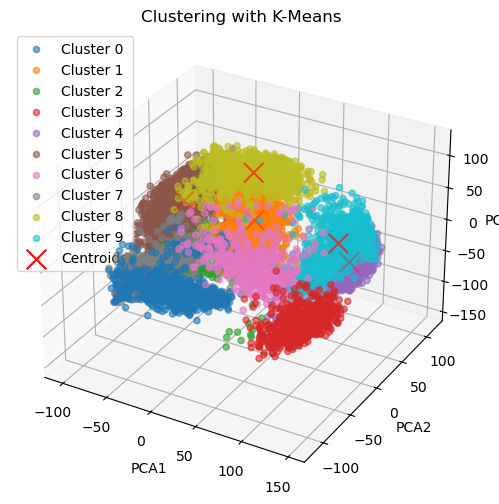

Metriche con Dataset: Raw
ARI: 0.5442289252152805
NMI: 0.6822008815866709
Homogeneity: 0.6683239516876879
Completeness: 0.6966663058236525
V-Measure: 0.682200881586671




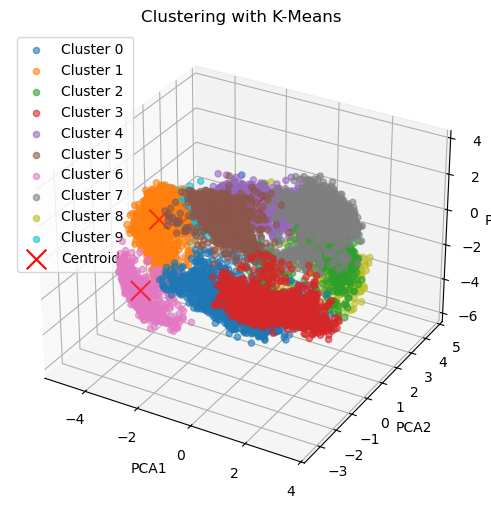

Metriche con Dataset: Standardized
ARI: 0.6043209469965586
NMI: 0.7088969002066173
Homogeneity: 0.7038712458571638
Completeness: 0.7139948371946025
V-Measure: 0.7088969002066172




/Users/alessandrococco/miniconda3/envs/analisi-pendigits/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


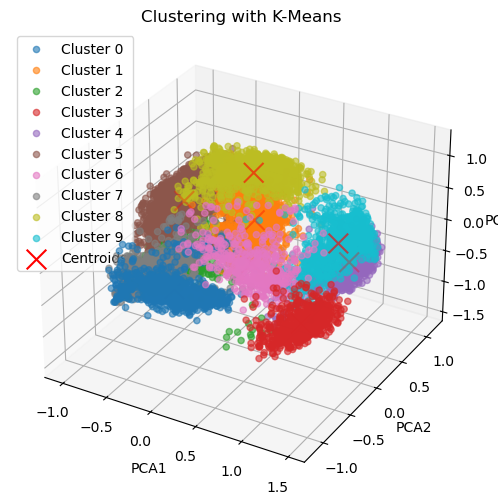

Metriche con Dataset: Normalized
ARI: 0.5442289252152805
NMI: 0.6822008815866709
Homogeneity: 0.6683239516876879
Completeness: 0.6966663058236525
V-Measure: 0.682200881586671




In [10]:
#per ogni dataset eseguo il kmeans e prendo centroidi e labels
for i, X in enumerate(datasets):
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_
    labels = kmeans.labels_

    #riduco le dimensioni per poter fare il plot
    pca = PCA(n_components=3)
    reduced_data = pca.fit_transform(X)
    reduced_centers = pca.transform(kmeans.cluster_centers_)

    #creo un dataframe con i dati ridotti e i cluster
    df_pca = pd.DataFrame(reduced_data, columns=['PCA1', 'PCA2', 'PCA3'])
    df_pca['Cluster'] = kmeans.labels_

    #plotto i dati in 3D
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(111, projection='3d')
    for cluster in range(10):
        cluster_data = df_pca[df_pca['Cluster'] == cluster]
        ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}', alpha=0.6)

    ax.scatter(reduced_centers[:, 0], reduced_centers[:, 1], reduced_centers[:, 2], marker='x', s=200, c='red', label='Centroids')
    ax.set_title('Clustering with K-Means')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.legend()
    plt.show()

    #calcolo i valori di similarità
    ari = adjusted_rand_score(y, labels)
    nmi = normalized_mutual_info_score(y, labels)
    hom = homogeneity_score(y, labels)
    comp = completeness_score(y, labels)
    vms = v_measure_score(y, labels)

    print(f"Metriche con Dataset: {datasets_names[i]}")
    print(f"ARI: {ari}")
    print(f"NMI: {nmi}")
    print(f"Homogeneity: {hom}")
    print(f"Completeness: {comp}")
    print(f"V-Measure: {vms}")
    print("\n")